In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [2]:
df=pd.read_csv("tips.csv")

In [3]:
print (('The data has the following shape'), df.shape)
print ("\n")
df.info()

The data has the following shape (244, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df = df.rename(columns={'total_bill': 'Bill', 'tip':'Tip', 'sex':'Gender', 'smoker':'Smoker', 'day':'Day','time':'Time', 'size': 'Party'})
df.head()

,Bill,Tip,Gender,Smoker,Day,Time,Party
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.describe()

,Bill,Tip,Party
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


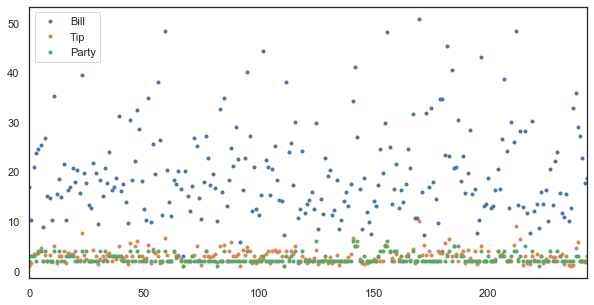

In [33]:
df.plot(style = "o", ms=3, figsize = [10,5])
plt.show()
#Ref1: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
#Ref2:http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/

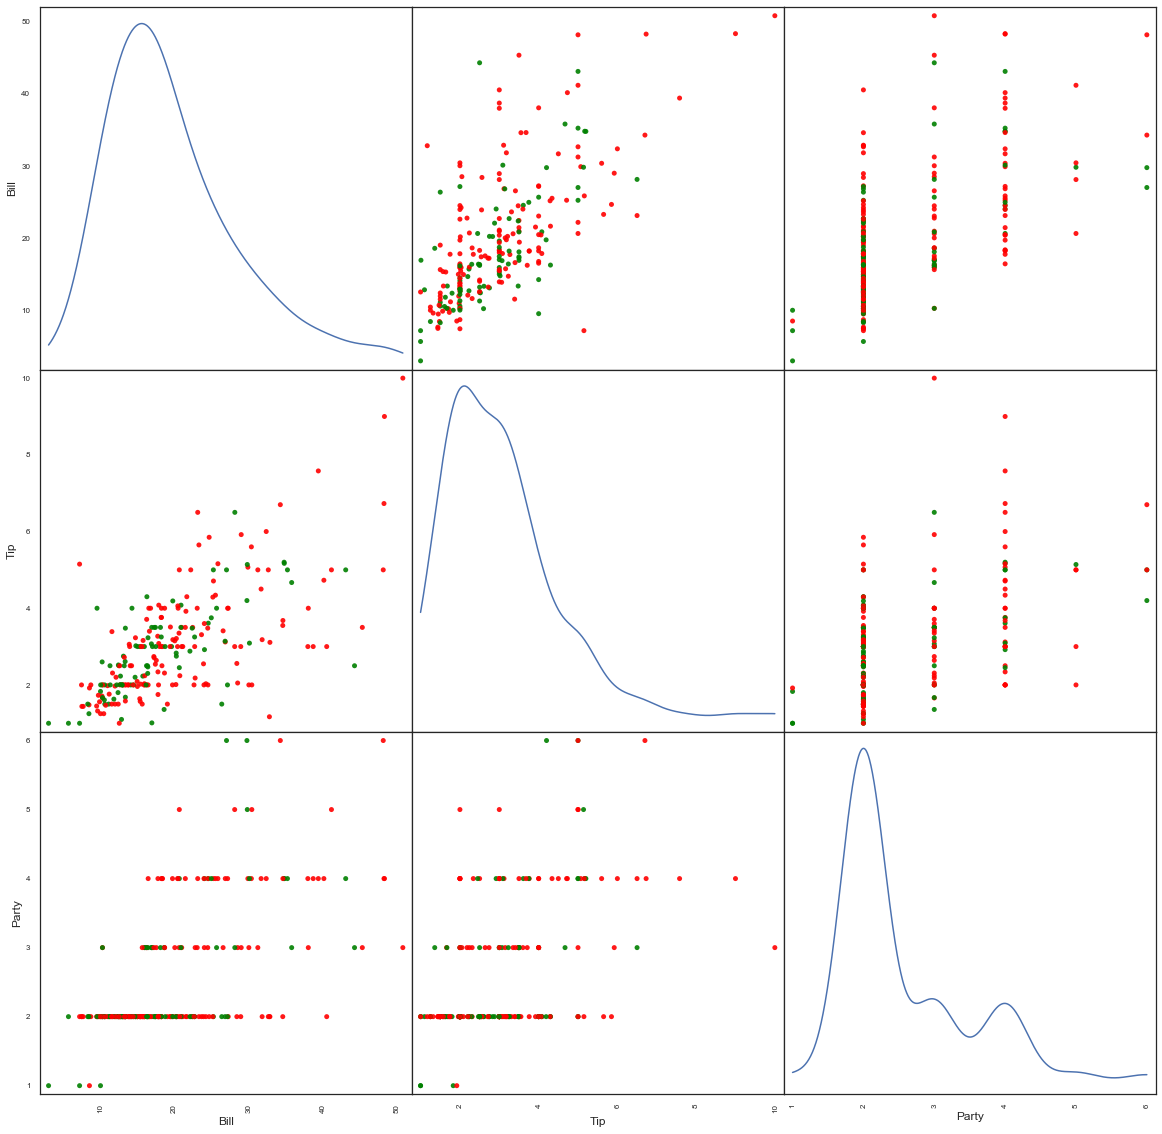

In [27]:
color_list = ['red' if i=='Male' else 'green' for i in df.loc[:,'Gender']]

pd.plotting.scatter_matrix(df, alpha=0.9, c = color_list, figsize = [20,20],
            diagonal = 'kde', s = 100, marker = '.')
plt.show()